In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('housing.csv')

Elimina los máximos

In [3]:
df = df[df['median_house_value'] != df['median_house_value'].max()]

## Crea un modelo de regresión lineal simple usando el ingreso y calcula su R2

In [5]:
model_income = linear_model.LinearRegression()
X_income = df[['median_income']]
target = 'median_house_value'
y = df[target]
model_income.fit(X_income, y)
predictions_income = model_income.predict(X_income)
r2_score(y_pred=predictions_income, y_true=y)

0.4129486198582022

## Crea un modelo de regresión lineal simple usando la edad de las casas

In [9]:
model_age = linear_model.LinearRegression()
X_age = df[['housing_median_age']]

model_age.fit(X_age, y)
predictions_age = model_age.predict(X_age)

r2_score(y_pred=predictions_age, y_true=y)

0.004616870761556036

## Crea un modelo de regresión lineal multiple usando las variables anteriores

In [12]:
model_multiple = linear_model.LinearRegression()
X_multiple = df[['median_income', 'housing_median_age']]

model_multiple.fit(X_multiple, y)
predicciones_multiple = model_multiple.predict(X_multiple)

r2_score(y_true=y, y_pred=predicciones_multiple)

0.45171387837376886

Escribe la ecuación del modelo

In [14]:
# Interepto
model_multiple.intercept_

-7997.527316094784

In [16]:
# Coeficientes
model_multiple.coef_

array([42420.02474575,  1567.97684924])

$Precio = -7997 + 1567 * edad + 42420 * ingreso$

$$Precio = \beta_0 + \beta_1 * x_1 + \beta_2* x_2$$

$$Precio = -10189 + 1744 * edad + 43169* ingreso$$

### Agrega la variable de households

In [18]:
model_multiple_2 = linear_model.LinearRegression()
X_multiple_2 = df[['median_income', 'housing_median_age', 'households']]

model_multiple_2.fit(X_multiple_2, y)
predicciones_multiple = model_multiple_2.predict(X_multiple_2)

r2_score(y_true=y, y_pred=predicciones_multiple)

0.4691647656140183

Escribe la ecuación del modelo

In [19]:
model_multiple_2.intercept_

-35840.77354418399

In [20]:
model_multiple_2.coef_

array([4.25476800e+04, 1.90691959e+03, 3.54211223e+01])

### Agrega todas

In [27]:
### Verific los NA's
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
# Quita NA's 
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [29]:
X = df.copy()
X = X.drop(target, axis=1)
X = pd.get_dummies(X)

model_todo = linear_model.LinearRegression().fit(X, y)

In [30]:
predicciones_todo = model_todo.predict(X)
r2_score(y_pred=predicciones_todo, y_true=y)

0.6119729299497514

In [31]:
coeficientes = pd.DataFrame({
    'names': X.keys(),
    'coeficientes': model_todo.coef_
})
coeficientes

,names,coeficientes
0,longitude,-24146.084691
1,latitude,-22299.970513
2,housing_median_age,911.724587
3,total_rooms,-5.867630
4,total_bedrooms,65.852744
5,population,-31.567024
6,households,68.208927
7,median_income,37911.255132
8,ocean_proximity_<1H OCEAN,-25430.859903
9,ocean_proximity_INLAND,-64411.683654


### Visualizando el modelo, calibracion

In [39]:
calibracion = pd.DataFrame({
    'predicciones': predicciones_todo,
    'real': y
})
calibracion['bins'] = pd.qcut(calibracion['predicciones'], q=10, labels=False) + 1
grouped_calibracion = calibracion.groupby('bins').mean()
grouped_calibracion['error'] = (grouped_calibracion['predicciones'] - 
                                grouped_calibracion['real'] ) / grouped_calibracion['predicciones']
grouped_calibracion

,predicciones,real,error
bins,,,
1,64728.773042,83369.002541,-0.287974
2,108650.963322,109338.739197,-0.006330
3,137060.655146,130383.079268,0.048720
4,159810.781602,149374.529741,0.065304
5,182374.846474,170914.888211,0.062837
6,203225.674833,193673.664972,0.047002
7,223997.964243,218647.635994,0.023886
8,246050.033321,245296.544715,0.003062
9,272028.023621,278532.994408,-0.023913


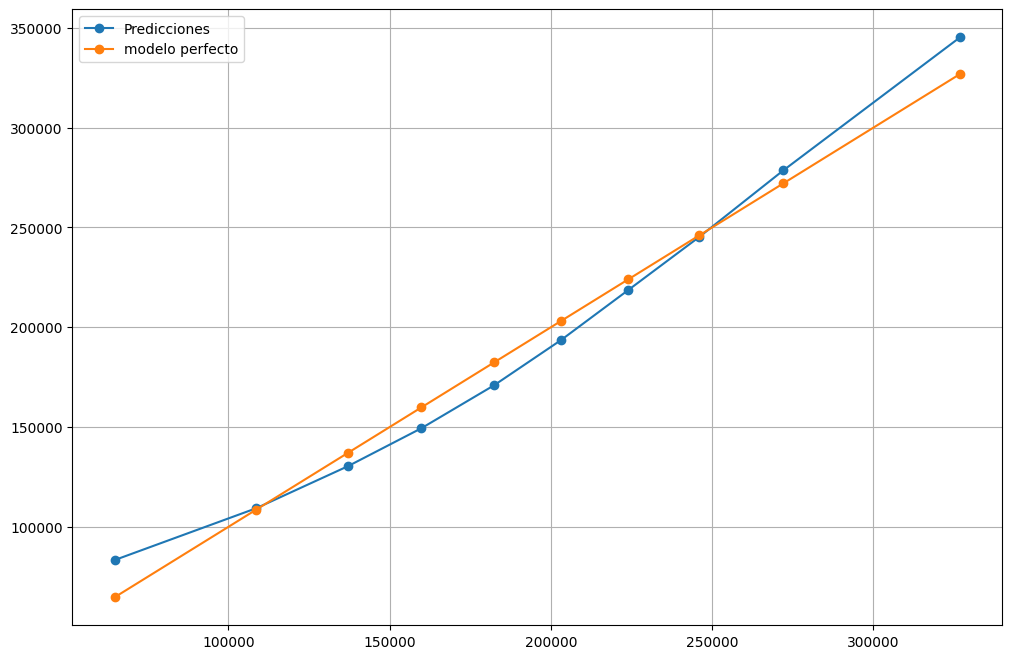

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(grouped_calibracion['predicciones'], grouped_calibracion['real'], marker='o', label='Predicciones')
plt.plot(grouped_calibracion['predicciones'], grouped_calibracion['predicciones'], marker='o', label='modelo perfecto')
plt.legend()
plt.grid()

### Compara la calibración de todos los modelos anteriores